In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [19]:
Min, Max, N = 0,20,201

x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]
omega = 0.5
print(h)

0.1


In [20]:
def h1(y):
    return 10.

def h2(y):
    return 0.

def h3(x):
    return 0.

def h4(x):
    return 0.

In [21]:
def InitT():

    T = np.zeros((N,N))

    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    T[:,0] = h3(x)
    T[:,-1] = h4(x)

    return T

In [22]:
T = InitT()
print(T)

[[ 0. 10. 10. ... 10. 10.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [23]:
def f(x,y):
    return np.exp(-x*y)

In [24]:
def GausSeidel(T,Nit = int(1e3), tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = ( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])/(4-f(x[i],y[j])*h**2)
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax

In [25]:
Tf1,_ = GausSeidel(T)

  0%|          | 1/1000 [00:00<06:38,  2.51it/s]

100%|██████████| 1000/1000 [05:39<00:00,  2.95it/s]


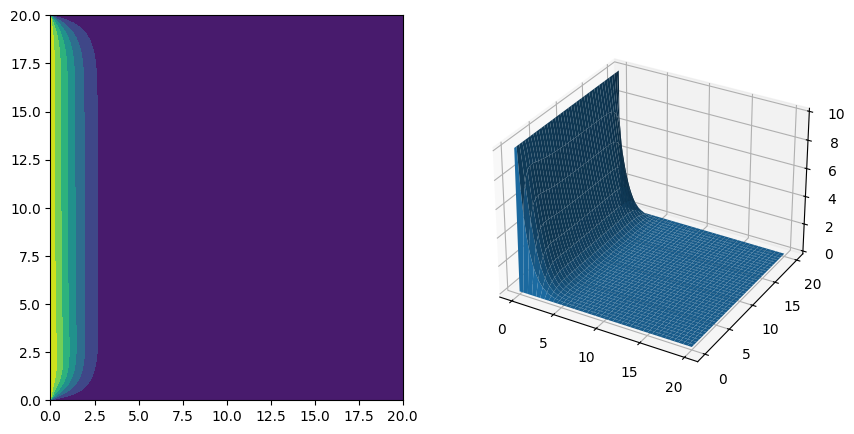

In [26]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Tf1.T)

ax1.plot_surface(X,Y,Tf1.T)